In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
def plot_roc(y,yhat):
    fpr,tpr, thresh = roc_curve(y, yhat)
    auc = roc_auc_score(y, yhat)
    print(f'AUC: {auc}')
    plt.figure(figsize=(3,3))

    plt.title('AUC - ROC Curve', fontsize=15)
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'o--')
    plt.show()

In [3]:
def evaluate_model(y,yhat):
    cm = confusion_matrix(y,yhat)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False)
    plt.show()
    print(classification_report(y,yhat))
    plot_roc(y,yhat)

In [4]:
def preprocess_data(df):
    le = LabelEncoder()
    scaler = StandardScaler()
    for col in df.columns:
        if data[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
        elif data[col].dtype in ['int32', 'int64']:
            df[col] ==  scaler.fit_transform(df[col])
    return df

### Read the data

In [5]:
pharma_df = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/Pharma_Industry.csv")
pharma_df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [6]:
X = pharma_df.drop('Drug Response', axis =1)
y = pharma_df['Drug Response']

In [7]:
X.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355
4,0.377100,0.538410,-0.029263,1.896015,-0.960130


In [8]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Drug Response, dtype: int64

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((400, 5), (100, 5), (400,), (100,))

#### Build the model

In [10]:
from sklearn.svm import SVC

In [11]:
model = SVC()
model.fit(X_train,y_train)

SVC()

### Evaluate model on training data

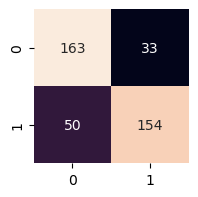

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       196
           1       0.82      0.75      0.79       204

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400

AUC: 0.793267306922769


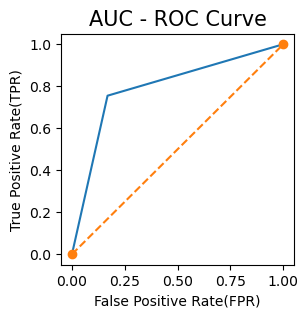

In [12]:
yhat_train = model.predict(X_train)
evaluate_model(y_train,yhat_train)

### Evaluate model on testing data

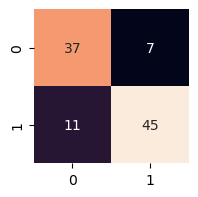

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.87      0.80      0.83        56

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100

AUC: 0.8222402597402598


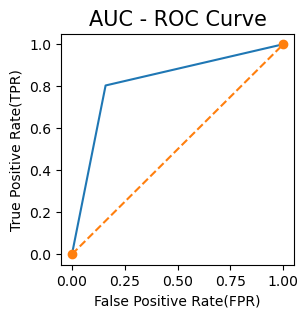

In [13]:
yhat_test = model.predict(X_test)
evaluate_model(y_test,yhat_test)

#### Non linear Data

In [14]:
data = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/Non_linear_SVM_Dataset.csv")
data.head()

,X1,X2,Y
0,0.830858,-0.334342,1.0
1,0.991710,0.879000,0.0
2,1.107245,-0.470344,1.0
3,-0.140899,1.033148,0.0
4,0.405592,1.328529,0.0


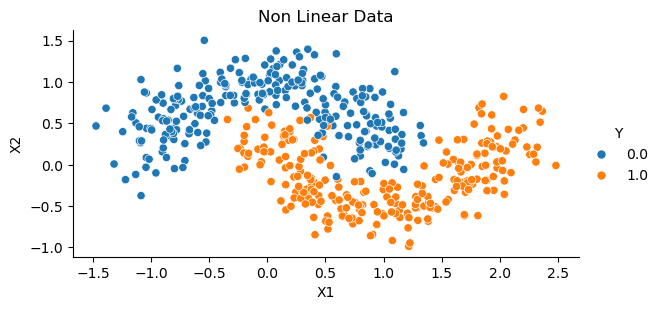

In [15]:
sns.relplot(data,x='X1',y='X2',
            kind='scatter',
            hue='Y',
            height=3,
            aspect=2            
           )
plt.title('Non Linear Data')
plt.show()